# Berg - Pre- and Post-Processing module

**To do:**
- Check if order of GSD classes is preserved while doing the back calculation
- Check strange occurence of ca. 85% for z_1000 in GZ layer
- Check method overall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
import re
import xarray

In [2]:
# Import local package
from compositional_data_kriging import pre_post_processing as ppp

In [3]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload

In [4]:
# Reload all packages (except those excluded by %aimport) every time before executing the Python code typed.
%autoreload 2

___

## Debug test

**To check:**
- Values that were used as input are correctly calculated after PPP module (new approach): TRUE

In [31]:
Debug_test = ppp.pre_processing_debug("../_DATA/Debug_test/Debugging_test1.xlsx", save_data=True, save_name="Test")

['Sheet2']
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[  5.94568356e-01   2.29844137e-01   1.17904647e-01   5.76828596e-02
   7.39181140e-33]
10
0.594568356147
0.229844137186
0.117904647065
0.0576828596017
7.3918113954e-33
4 PCA components with variance sum 1.0 needed for obtaining sum of variance > 0.95
Sheet2
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
           z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
hole_id                                                                         
1        0.459084  0.247886  0.623383 -0.530668 -0.269239 -0.130242  0.840218   
3        0.680100 -0.537915 -1.033115  0.368721 -0.395876 -0.121205 -0.041370   
5       -0.985128  0.555213 -0.052917  0.643109  1.253040  0.389851  1.110087   
7        1.203335 -0.330312  1.154250  1.243980 -0.024213 -0.599274 -1.113260   
9        0

In [35]:
Debug_test2 = ppp.pre_processing_debug("../_DATA/Debug_test/Debugging_test2.xlsx", save_data=True, save_name="Test2")

['Sheet2']
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[  3.01890377e-01   1.99393037e-01   1.85646856e-01   1.21745665e-01
   9.62753235e-02   4.63181015e-02   2.31214935e-02   1.89238991e-02
   6.68524770e-03   8.62698973e-33]
10
0.30189037719
0.199393036802
0.18564685613
0.121745664594
0.0962753234638
0.0463181014971
0.0231214935356
0.018923899082
0.0066852477049
8.6269897308e-33
6 PCA components with variance sum 0.951269359678 needed for obtaining sum of variance > 0.95
Sheet2
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
           z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
hole_id                                                                         
2        0.684972  0.792716  0.695753  0.618313  0.841678  0.868525  0.832375   
4        0.656723  0.346121 -0.731699  0.369487 -0.051665  0.332177  0.742447 

In [17]:
Debug_test

[{'Sheet2':            z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
  hole_id                                                                         
  1        0.459084  0.247886  0.623383 -0.530668 -0.269239 -0.130242  0.840218   
  3        0.680100 -0.537915 -1.033115  0.368721 -0.395876 -0.121205 -0.041370   
  5       -0.985128  0.555213 -0.052917  0.643109  1.253040  0.389851  1.110087   
  7        1.203335 -0.330312  1.154250  1.243980 -0.024213 -0.599274 -1.113260   
  9        0.264300  0.410113 -0.758513  1.043401 -0.033104 -0.994396  1.054191   
  
               z_90      z_63       z_0  
  hole_id                                
  1       -0.626994 -1.072475  0.459046  
  3        0.587330  0.055775  0.437555  
  5       -0.986723 -1.517901 -0.408630  
  7        0.968930  0.443957 -2.947392  
  9        0.419253 -1.058127 -0.347119  },
 {'Sheet2': PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', to

In [23]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 3\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=1,
                   save_data=True)

Test GZ
GZ_z250_PC01_3x3.xlsx (3, 3)
GZ_z250_PC02_3x3.xlsx (3, 3)
Number of grid points per file : 9.0
Number of grid points in total: 18
(2, 3, 3)
gridpoints: 9
points [-0.16738080874580299, -0.177039239043247]
X [-0.05138405  0.02582064 -0.03677699 -0.03281553  0.01903448  0.02088034
  0.072554   -0.05570665 -0.05947093  0.0978647 ]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[-0.16738080874580299, -0.177039239043247],
 [0.030238324616140198, -0.18071580317327901],
 [0.37188239946214402, -0.20397832684127601],
 [-0.26557986805177503, -0.031876834538802197],
 [-0.17866799714988399, -0.042920523058447298],
 [0.22539635075809999, 0.0222237483225514],
 [-0.30502228164425499, 0.13660178992263],
 [-0.070421841909814806, 0.17106271695702899],
 [0.27918868807779801, 0.28733629902034002]]

In [21]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test2/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 3\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=4,
                   save_data=True)

Test GZ
Test_grid2_PC01_3x3.asc.xlsx (3, 3)
Test_grid2_PC02_3x3.asc.xlsx (3, 3)
Test_grid2_PC03_3x3.asc.xlsx (3, 3)
Test_grid2_PC04_3x3.asc.xlsx (3, 3)
Number of grid points per file : 9.0
Number of grid points in total: 36
(4, 3, 3)
gridpoints: 9
points [3.4945128049659191, -0.69751755247337033, 0.18914200746951551, -0.0072163101895359452]
X [ 0.87899641 -0.39930933  1.16763201  0.69027122 -0.1303345  -0.30822081
 -1.48323301  0.89657066  1.07371085 -2.38608351]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[3.4945128049659191,
  -0.69751755247337033,
  0.18914200746951551,
  -0.0072163101895359452],
 [0.72833949755688343,
  -0.71461868098260573,
  -0.49976863073560568,
  0.1763323930624203],
 [-0.4937634552120822,
  0.31513734384823788,
  -1.1088455876412751,
  0.8211430338849256],
 [0.40800672818983519,
  -0.74578993116954462,
  0.60170358562432724,
  0.007275881659693173],
 [-1.7616455393929931,
  -1.65431069896255,
  -0.29563427205771348,
  -0.54195691332951301],
 [-0.8042115053561576,
  0.37372541127062953,
  -0.66819352827403555,
  -0.12916528181306039],
 [-1.226763508862432,
  0.24380986741015301,
  1.411593377380993,
  0.43430021361089383],
 [-1.1245442747232059,
  0.34255416108369041,
  0.43327868808589748,
  -0.29822179321578762],
 [-0.01234030149841292,
  1.792881040177529,
  -0.19625552515151989,
  -0.70627002397676941]]

In [32]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test3/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 4\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=4,
                   save_data=True)

Test GZ
Test_grid2_PC01_4x3.asc.xlsx (3, 4)
Test_grid2_PC02_4x3.asc.xlsx (3, 4)
Test_grid2_PC03_4x3.asc.xlsx (3, 4)
Test_grid2_PC04_4x3.asc.xlsx (3, 4)
Number of grid points per file : 12.0
Number of grid points in total: 48
(4, 3, 4)
gridpoints: 12
points [3.4945128049659182, -0.69751755247337077, 0.18914200746951551, 0.18914200746951551]
X [ 0.9337103  -0.33694193  1.21482678  0.69126538 -0.19479224 -0.42617489
 -1.40421649  0.9185042   1.00792811 -2.40410921]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[3.4945128049659182,
  -0.69751755247337077,
  0.18914200746951551,
  0.18914200746951551],
 [0.90852411867111704,
  -0.99658785697385821,
  -0.36728603911925928,
  -0.36728603911925928],
 [-0.048336401881971969,
  -0.3954841702238801,
  -0.77924003861716273,
  -0.77924003861716273],
 [-0.49376345521208398,
  0.31513734384823788,
  -1.1088455876412739,
  -1.1088455876412739],
 [0.4015189057058195,
  -0.71836721972082873,
  0.59426120667626381,
  0.59426120667626381],
 [-1.7616455393929931,
  -1.65431069896255,
  -0.29563427205771348,
  -0.29563427205771348],
 [-0.70924669840078547,
  0.10414603441533581,
  -0.57965231473585521,
  -0.57965231473585521],
 [-0.49643719541894121,
  0.86495957747846886,
  -0.81233646129295201,
  -0.81233646129295201],
 [-1.2267635088624309,
  0.2438098674101529,
  1.4115933773809921,
  1.4115933773809921],
 [-1.131032097207219,
  0.36997687253240669,
  0.42583630913783438,
  0.42583630913783438],
 [-0.012340301498410479,
  1.7928810401775299,
  -0.19625552

In [38]:
Debug_test2[0]

{'Sheet2':            z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
 hole_id                                                                         
 2        0.684972  0.792716  0.695753  0.618313  0.841678  0.868525  0.832375   
 4        0.656723  0.346121 -0.731699  0.369487 -0.051665  0.332177  0.742447   
 6        0.349865  0.779176  0.519301 -2.273302  0.342097  0.437485 -0.441736   
 9       -1.931051  1.085188  0.451506  0.681823 -0.075202 -0.221419 -0.132221   
 11       0.392764  0.373655 -2.044875  1.152033 -1.665302  1.218055  0.863196   
 12      -1.597651  1.266113  0.082954  0.763081 -0.117706  0.356273 -2.985185   
 14      -0.053906  0.580745  0.391107  0.385715  0.705339 -0.139514 -2.772611   
 16       0.278368  0.930808 -1.128203  0.852404 -2.679210  0.541124  0.388247   
 18      -0.365971 -0.137684  0.640309  0.230112 -0.241966 -1.002450  0.404542   
 19       0.373123 -0.743141 -0.166023  0.179611  0.057278 -0.148829  0.135368   
 20   

In [41]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test4/GZ/", 
                   Debug_test2[0],
                   Debug_test2[1],
                   grid_data="ncols 6\n" +
                             "nrows 5\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=9,
                   save_data=True)

Test GZ
Test_grid3_PC01_5x6.asc.xlsx (5, 6)
Test_grid3_PC02_5x6.asc.xlsx (5, 6)
Test_grid3_PC03_5x6.asc.xlsx (5, 6)
Test_grid3_PC04_5x6.asc.xlsx (5, 6)
Test_grid3_PC05_5x6.asc.xlsx (5, 6)
Test_grid3_PC06_5x6.asc.xlsx (5, 6)
Test_grid3_PC07_5x6.asc.xlsx (5, 6)
Test_grid3_PC08_5x6.asc.xlsx (5, 6)
Test_grid3_PC09_5x6.asc.xlsx (5, 6)
Test_grid3_PC10_5x6.asc.xlsx (5, 6)
Number of grid points per file : 30.0
Number of grid points in total: 300
(10, 5, 6)
gridpoints: 30
points [0.18082306432228371, 0.34685519771278661, 0.19517722399296389, -0.1852731752389267, 0.31112104636740412, 0.34676000787261652, -0.083764062108915752, 0.30299296949924498, 0.27783870729202792, -3.1362822254160438e-16]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[0.18082306432228371,
  0.34685519771278661,
  0.19517722399296389,
  -0.1852731752389267,
  0.31112104636740412,
  0.34676000787261652,
  -0.083764062108915752,
  0.30299296949924498,
  0.27783870729202792,
  -3.1362822254160438e-16],
 [0.23500639885209029,
  0.8562393050815581,
  -0.74937506792377473,
  -0.13109340350627979,
  0.13732580908515149,
  0.089622236082076867,
  -0.37826052086737372,
  0.68498540707331967,
  0.54315986611948386,
  -2.434043256404298e-16],
 [-0.21803572758478801,
  0.1450141274011271,
  -0.4670323000743089,
  0.59521060167696649,
  -0.082552054149365617,
  -0.46426301102353262,
  -0.175547249061065,
  0.42530907675619389,
  0.15640146073083441,
  3.8396363186375111e-17],
 [-0.11526582297116141,
  -0.32314549526663228,
  0.42703367960174532,
  0.92402105790767219,
  0.31257212263234152,
  -0.62766915863306205,
  -0.47887195727227838,
  0.18729990093551049,
  0.054464201304265603,
  7.0564907439141975e-16],
 [-0.82334022897945203,
  -0.6073438351187378,
  1.

In [42]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test5/GZ/", 
                   Debug_test2[0],
                   Debug_test2[1],
                   grid_data="ncols 11\n" +
                             "nrows 9\n" +
                             "xllcorner -0.25\n" +
                             "yllcorner -0.25\n" +
                             "cellsize 0.5\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=9,
                   save_data=True)

Test GZ
Test_grid4_PC01_5x6.asc.xlsx (9, 11)
Test_grid4_PC02_5x6.asc.xlsx (9, 11)
Test_grid4_PC03_5x6.asc.xlsx (9, 11)
Test_grid4_PC04_5x6.asc.xlsx (9, 11)
Test_grid4_PC05_5x6.asc.xlsx (9, 11)
Test_grid4_PC06_5x6.asc.xlsx (9, 11)
Test_grid4_PC07_5x6.asc.xlsx (9, 11)
Test_grid4_PC08_5x6.asc.xlsx (9, 11)
Test_grid4_PC09_5x6.asc.xlsx (9, 11)
Number of grid points per file : 99.0
Number of grid points in total: 891
(9, 9, 11)
gridpoints: 99
points [0.18082306432228371, 0.34685519771278661, 0.19517722399296389, -0.1852731752389267, 0.31112104636740412, 0.34676000787261652, -0.083764062108915752, 0.30299296949924498, 0.27783870729202792]


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[0.18082306432228371,
  0.34685519771278661,
  0.19517722399296389,
  -0.1852731752389267,
  0.31112104636740412,
  0.34676000787261652,
  -0.083764062108915752,
  0.30299296949924498,
  0.27783870729202792],
 [0.047347392260940417,
  0.58659774054362024,
  -0.27174233842264123,
  -0.1837761057139557,
  0.27574764731844681,
  0.29444275045733642,
  -0.23087406915746689,
  0.42808484342083047,
  0.38088346182155691],
 [0.23500639885209029,
  0.8562393050815581,
  -0.74937506792377473,
  -0.13109340350627979,
  0.13732580908515149,
  0.089622236082076867,
  -0.37826052086737372,
  0.68498540707331967,
  0.54315986611948386],
 [-0.17913163587898581,
  0.4980700025121616,
  -0.72436077837828927,
  0.25397997152629048,
  -0.042122767606509459,
  -0.16672913001396239,
  -0.22846130264370329,
  0.51299077706597451,
  0.31239993603531407],
 [-0.21803572758478801,
  0.1450141274011271,
  -0.4670323000743089,
  0.59521060167696649,
  -0.082552054149365617,
  -0.46426301102353262,
  -0.175547249

In [62]:
ppp.post_processing("../_DATA/Debug_test/data_Berg/GZ/", 
                   Berg_preprocessed_results[0],
                   Berg_preprocessed_results[1],
                   grid_data="ncols 100\n" +
                             "nrows 90\n" +
                             "xllcorner 5.6208706962070707\n" +
                             "yllcorner 50.959635321741573\n" +
                             "cellsize 0.00013436758585859339\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=9,
                   save_data=True)

Berg GZ
Berg_test_PC01_90x100.asc.xlsx (90, 100)
Berg_test_PC02_90x100.asc.xlsx (90, 100)
Berg_test_PC03_90x100.asc.xlsx (90, 100)
Berg_test_PC04_90x100.asc.xlsx (90, 100)
Berg_test_PC05_90x100.asc.xlsx (90, 100)
Berg_test_PC06_90x100.asc.xlsx (90, 100)
Berg_test_PC07_90x100.asc.xlsx (90, 100)
Berg_test_PC08_90x100.asc.xlsx (90, 100)
Berg_test_PC09_90x100.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000


[[-7.8830577478799224,
  -1.327041311568868,
  -1.998858293374101,
  -1.4054719756764069,
  0.018897536268116969,
  -0.47889597462387989,
  -0.092525453017427761,
  -0.054316727064457337,
  0.034538729210682191],
 [-7.8897713762519537,
  -1.3373284977616291,
  -2.0299475803109961,
  -1.4290682829070369,
  0.022105036523410782,
  -0.48500876871493759,
  -0.08723283268220583,
  -0.05589400731173888,
  0.036133143255898892],
 [-7.8957319011591416,
  -1.347819495167172,
  -2.0609888888422918,
  -1.452405528575017,
  0.024800720902419471,
  -0.49148238207547479,
  -0.081735687157282966,
  -0.057419799136922078,
  0.037726511128211258],
 [-7.9008150643157951,
  -1.358498661927406,
  -2.0919130555341581,
  -1.475445729506633,
  0.02694440590833392,
  -0.49836671242450947,
  -0.076045051262614294,
  -0.058891412038980302,
  0.039311823966268797],
 [-7.9048849537398302,
  -1.3693521186614031,
  -2.1226442719468208,
  -1.4981479502856201,
  0.028493900375857521,
  -0.50571374936744462,
  -0.0701

___

## Pre-processing

In [43]:
# Berg pre-processing
Berg_preprocessed_results = ppp.pre_processing("../_DATA/Berg_usable_data.xlsx", save_data=True, save_name="Berg_usable_data_pca2");

['TZ', 'IZ', 'GZ']
(39, 10)
(39, 10)
(36, 10)
5 PCA components with variance sum 0.975138287008 needed for obtaining sum of variance > 0.95
5 PCA components with variance sum 0.982631491181 needed for obtaining sum of variance > 0.95
5 PCA components with variance sum 0.99018254756 needed for obtaining sum of variance > 0.95
Hello (39, 12)
Hello (39, 12)
Hello (36, 12)


In [41]:
Berg_preprocessed_results[1]

{'GZ': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'IZ': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'TZ': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)}

In [15]:
# MHZ pre-processing
MHZ_preprocessed_results = ppp.pre_processing("../_DATA/MHZ_usable_data.xlsx", save_data=True, save_name="MHZ_usable_data_pca");

['TZ', 'IZ', 'GZ']
(47, 10)
(61, 10)
(58, 10)
3 PCA components with variance sum 0.961747601823 needed for obtaining sum of variance > 0.95
4 PCA components with variance sum 0.984611393128 needed for obtaining sum of variance > 0.95
4 PCA components with variance sum 0.958923555936 needed for obtaining sum of variance > 0.95
Hello (47, 12)
Hello (61, 12)
Hello (58, 12)


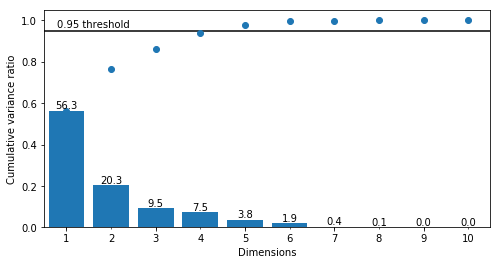

In [32]:
ppp.intr_dim(Berg_preprocessed_results[0]["TZ"], n_comp=10, cumul=True, bar=True)

___

## Post_processing

In [33]:
# Berg TZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_Berg/TZ/", 
                    Berg_preprocessed_results[0], 
                    Berg_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 90\n" +
                              "xllcorner 5.6208707817415728\n" +
                              "yllcorner 50.959635321741573\n" +
                              "cellsize 0.00013419651685393446\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000
Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg TZ
Upper_transfo

In [48]:
# Berg IZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_Berg/IZ/", 
                    Berg_preprocessed_results[0], 
                    Berg_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 90\n" +
                              "xllcorner 5.6208707817415728\n" +
                              "yllcorner 50.959635321741573\n" +
                              "cellsize 0.00013419651685393446\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

Berg IZ
Middle_transformed_PC01.asc.xlsx (90, 100)
Middle_transformed_PC02.asc.xlsx (90, 100)
Middle_transformed_PC03.asc.xlsx (90, 100)
Middle_transformed_PC04.asc.xlsx (90, 100)
Middle_transformed_PC05.asc.xlsx (90, 100)
Middle_transformed_PC06.asc.xlsx (90, 100)
Middle_transformed_PC07.asc.xlsx (90, 100)
Middle_transformed_PC08.asc.xlsx (90, 100)
Middle_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000
Berg IZ
Middle_transformed_PC01.asc.xlsx (90, 100)
Middle_transformed_PC02.asc.xlsx (90, 100)
Middle_transformed_PC03.asc.xlsx (90, 100)
Middle_transformed_PC04.asc.xlsx (90, 100)
Middle_transformed_PC05.asc.xlsx (90, 100)
Middle_transformed_PC06.asc.xlsx (90, 100)
Middle_transformed_PC07.asc.xlsx (90, 100)
Middle_transformed_PC08.asc.xlsx (90, 100)
Middle_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg IZ
Middle_transformed_PC01.asc.xlsx (90, 100)
Middle_transformed_PC02.asc.xlsx (90, 100)
Middle_transformed_PC03.asc.xlsx (90, 100)
Middle_transformed_PC04.asc.xlsx (90, 100)
Middle_transformed_PC05.asc.xlsx (90, 100)
Middle_transformed_PC06.asc.xlsx (90, 100)
Middle_transformed_PC07.asc.xlsx (90, 100)
Middle_transformed_PC08.asc.xlsx (90, 100)
Middle_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000


KeyboardInterrupt: 

In [50]:
ppp.post_processing("../_DATA/Debug_test/data_Berg/TZ/", 
                   Berg_preprocessed_results[0],
                   Berg_preprocessed_results[1],
                   grid_data="ncols 100\n" +
                             "nrows 90\n" +
                             "xllcorner 5.6208706962070707\n" +
                             "yllcorner 50.959635321741573\n" +
                             "cellsize 0.00013436758585859339\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=9,
                   save_data=True)

Berg TZ
Berg_test_PC01_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC02_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC03_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC04_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC05_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC06_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC07_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC08_90x100_TZ.asc.xlsx (90, 100)
Berg_test_PC09_90x100_TZ.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000


[[-5.836198806107447,
  0.89186202052636065,
  0.050938740365126023,
  0.56841375556272311,
  -1.1925054432106761,
  -0.13450293665957599,
  -0.64837571058416832,
  -0.1039232812394886,
  -0.0068739953332226386],
 [-5.7933168728641249,
  0.88295797065418913,
  0.069954615619195692,
  0.57271772766854656,
  -1.1835468167507071,
  -0.12804601270733329,
  -0.64852043472635423,
  -0.10845913584442381,
  -0.0076409133131797313],
 [-5.7504724995432923,
  0.87277321131509222,
  0.0888313199935169,
  0.57710708578007086,
  -1.174574001090035,
  -0.1213107538501106,
  -0.64871943265724652,
  -0.11337898953937089,
  -0.0083814322032240707],
 [-5.7077909805877454,
  0.86120483805459713,
  0.1075600251824369,
  0.58158496061846421,
  -1.1656218895075181,
  -0.1142935783154222,
  -0.64898383523976388,
  -0.1186954351178717,
  -0.0090951028851867788],
 [-5.6654018753380626,
  0.84815271206246479,
  0.12613533338591759,
  0.58615430700029236,
  -1.156727325736536,
  -0.10699208630123989,
  -0.6493254

In [49]:
# Berg GZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_Berg/GZ/", 
                    Berg_preprocessed_results[0], 
                    Berg_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 90\n" +
                             "xllcorner 5.6208706962070707\n" +
                             "yllcorner 50.959635321741573\n" +
                             "cellsize 0.00013436758585859339\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

Berg GZ
Lower_transformed_PC01.asc.xlsx (90, 100)
Lower_transformed_PC02.asc.xlsx (90, 100)
Lower_transformed_PC03.asc.xlsx (90, 100)
Lower_transformed_PC04.asc.xlsx (90, 100)
Lower_transformed_PC05.asc.xlsx (90, 100)
Lower_transformed_PC06.asc.xlsx (90, 100)
Lower_transformed_PC07.asc.xlsx (90, 100)
Lower_transformed_PC08.asc.xlsx (90, 100)
Lower_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000
Berg GZ
Lower_transformed_PC01.asc.xlsx (90, 100)
Lower_transformed_PC02.asc.xlsx (90, 100)
Lower_transformed_PC03.asc.xlsx (90, 100)
Lower_transformed_PC04.asc.xlsx (90, 100)
Lower_transformed_PC05.asc.xlsx (90, 100)
Lower_transformed_PC06.asc.xlsx (90, 100)
Lower_transformed_PC07.asc.xlsx (90, 100)
Lower_transformed_PC08.asc.xlsx (90, 100)
Lower_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg GZ
Lower_transformed_PC01.asc.xlsx (90, 100)
Lower_transformed_PC02.asc.xlsx (90, 100)
Lower_transformed_PC03.asc.xlsx (90, 100)
Lower_transformed_PC04.asc.xlsx (90, 100)
Lower_transformed_PC05.asc.xlsx (90, 100)
Lower_transformed_PC06.asc.xlsx (90, 100)
Lower_transformed_PC07.asc.xlsx (90, 100)
Lower_transformed_PC08.asc.xlsx (90, 100)
Lower_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg GZ
Lower_transfo

In [38]:
# MHZ TZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ/TZ/", 
                    MHZ_preprocessed_results[0], 
                    MHZ_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 81\n" +
                              "xllcorner 5.5967107547500001\n" +
                              "yllcorner 50.982328804750004\n" + 
                              "cellsize 0.00017565049999994641\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 8100
MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900
gridpoints: 8100
MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number

In [39]:
# MHZ IZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ/IZ/", 
                    MHZ_preprocessed_results[0], 
                    MHZ_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 81\n" +
                              "xllcorner 5.5967107547500001\n" +
                              "yllcorner 50.982328804750004\n" + 
                              "cellsize 0.00017565049999994641\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

MHZ IZ
Middle_transformed_MHZ_PC01.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC02.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC03.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC04.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC05.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC06.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC07.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC08.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 8100
MHZ IZ
Middle_transformed_MHZ_PC01.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC02.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC03.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC04.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC05.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC06.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC07.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC08.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid points in total: 72900
gridpoints: 8100
MHZ IZ
Middle_transformed_MHZ_PC01.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC02.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC03.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC04.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC05.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC06.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC07.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC08.asc.xlsx (81, 100)
Middle_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per fi

In [40]:
# MHZ GZ
for i in range(1,10):
    ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ/GZ/", 
                    MHZ_preprocessed_results[0], 
                    MHZ_preprocessed_results[1],
                    grid_data="ncols 100\n" +
                              "nrows 74\n" +
                              "xllcorner 5.5967023331506844\n" +
                              "yllcorner 50.982320383150686\n" + 
                              "cellsize 0.00019249369863007826\n" +
                              "nodata_value 1.7014100000000001E+038\n",
                    n_components=i,
                    save_data=True);

MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number of grid points in total: 66600


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 7400
MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number of grid points in total: 66600
gridpoints: 7400
MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number